<a href="https://colab.research.google.com/github/HardikPrabhu/Quick-tutorials-for-pytorch/blob/main/A_notebook_for_pytorch_tensor_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import numpy as np

## Basics

Tensors are essentially numpy arrays with ability to store gradients and "connect" in a computational graph . (Not to be confused with mathematical notion of a tensor, tensors here are numpy array with additional properties.)

In [12]:
#Tensors just like numpy arrays store information in nested arrays.
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)
# some attributes
print(f"Shape of tensor: {x.shape}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Device tensor is stored on: {x.device}") # stored on cpu by default
print(f"Dimensions : {x.ndim}" )

tensor([[1, 2, 3],
        [4, 5, 6]])
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu
Dimensions : 2


In [13]:
# Dimensions represents the "nested nature" of arrays.
# Dimensions or "x.ndim"  denotes the length of the "x.shape" array. Known as the dimension of a tensor (again not the Mathematical notion of dimenisions)
x = torch.tensor(2.3)
print(x,x.ndim,x.shape)  # A scaler value has a dimension 0. (unlike the vector space notion)

# 1-d with 1 element is not scaler
x = torch.tensor([3])
print(x,x.ndim,x.shape)

tensor(2.3000) 0 torch.Size([])
tensor([3]) 1 torch.Size([1])


Creating Tensors

In [8]:
# Creating tensors from Python lists
print("From Python lists:")
x = torch.tensor([1, 2, 3, 4])
print(f"x = {x}")
print(f"Type: {x.dtype}, Shape: {x.shape}, Device: {x.device}")

From Python lists:
x = tensor([1, 2, 3, 4])
Type: torch.int64, Shape: torch.Size([4]), Device: cpu


In [17]:
# Common tensor initialization functions
print("\nCommon initialization functions:")
zeros = torch.zeros(3, 4)  # 3x4 tensor of zeros
ones = torch.ones(2, 2)    # 2x2 tensor of ones
rand = torch.rand(2, 3)    # 2x3 tensor of random numbers from uniform distribution [0,1)
randn = torch.randn(2, 3)  # 2x3 tensor of random numbers from standard normal distribution
arange = torch.arange(0, 10, step=2)  # tensor with values [0, 2, 4, 6, 8]
linspace = torch.linspace(0, 1, steps=5)  # 5 equally spaced points between 0 and 1

print(f"zeros:\n{zeros}")
print(f"ones:\n{ones}")
print(f"rand:\n{rand}")
print(f"randn:\n{randn}")
print(f"arange: {arange}")
print(f"linspace: {linspace}")


Common initialization functions:
zeros:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
ones:
tensor([[1., 1.],
        [1., 1.]])
rand:
tensor([[0.0154, 0.2604, 0.4733],
        [0.3706, 0.9085, 0.4695]])
randn:
tensor([[-0.1661, -0.5837,  0.1265],
        [ 0.3539, -1.3090, -0.2658]])
arange: tensor([0, 2, 4, 6, 8])
linspace: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [24]:
# Creating tensors from NumPy arrays
np_array = np.array([1, 2, 3, 4])
tensor_from_np = torch.from_numpy(np_array)
print(f"NumPy array: {np_array}")
print(f"Tensor from NumPy: {tensor_from_np,type(tensor_from_np)}")

# Convert tensor back to NumPy
np_from_tensor = tensor_from_np.numpy()
print(f"NumPy from tensor: {np_from_tensor,type(np_from_tensor)}")

NumPy array: [1 2 3 4]
Tensor from NumPy: (tensor([1, 2, 3, 4]), <class 'torch.Tensor'>)
NumPy from tensor: (array([1, 2, 3, 4]), <class 'numpy.ndarray'>)


In [27]:
# Shared memory between numpy array and tensor (only works when tensor is on cpu, not gpu, as numpy array cant be stored on gpu):
np_array[0] = 100
print(f"Modified NumPy array: {np_array}")
print(f"Tensor after NumPy modification: {tensor_from_np}")


Modified NumPy array: [100   2   3   4]
Tensor after NumPy modification: tensor([100,   2,   3,   4])


Transfeering between CPU and GPU is straight forward

In [70]:
# Create a tensor on CPU
x_cpu = torch.tensor([1, 2, 3])
print(f"Tensor on CPU: {x_cpu}, Device: {x_cpu.device}")

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    # Move tensor to GPU
    x_gpu = x_cpu.cuda()
    # Or equivalently:
    # x_gpu = x_cpu.to('cuda')
    print(f"Tensor on GPU: {x_gpu}, Device: {x_gpu.device}")

    # Move back to CPU
    x_back_to_cpu = x_gpu.cpu()
    # Or equivalently:
    # x_back_to_cpu = x_gpu.to('cpu')
    print(f"Tensor back on CPU: {x_back_to_cpu}, Device: {x_back_to_cpu.device}")
else:
    print("CUDA not available, skipping GPU examples")


Tensor on CPU: tensor([1, 2, 3]), Device: cpu
CUDA not available, skipping GPU examples


Accesing elements in a tensor

In [55]:
x = torch.tensor([[1,2,3],[4,5,6]])
# first row:
print("first row :", x[0]) # equivalently x[0,:] (this way is better as it clearly says the axis from which we want all the elements - using :)
# first column
print("first col :", x[:,0])
# first row first column
x[0,0] # returns a scaler

# changing an element (it happens in place)
x[1,1] = 10
print(x)

first row : tensor([1, 2, 3])
first col : tensor([1, 4])
tensor([[ 1,  2,  3],
        [ 4, 10,  6]])


In [61]:
x[1,:]
# shape [2,3] -> [3]

tensor([ 4, 10,  6])

In [62]:
x[:,2] # (2+1th column)
# shape [2,3] -> [2] Notice it's not [2,1]

tensor([3, 6])

In case of N-D

Consider the shape list for tensor T be [x,y,z] (3-D) now if a index is specified along a axis, just remove it list.pop(axis):


- If T[i,:,:] then  shape [y,z] is returned (for the new tensor)
- If T[:,j,:] then shape [x,z] is returned
- If T[:,:,k] then shape [x,y] is returned

This rule holds for tensors of any shape. Must keep in mind if we are doing a sequence of complex transformations and projections.

In [66]:
# 3D example
x = torch.arange(1,37)
x = x.view(3,4,3) # to arrage in desired shape (shape=[3,4,3])
print(x)

# first block
f_block = x[0]  # trailing ':' are assumed x[0]=x[0,:]=x[0,:,:] (shape=[4,3])
print("first block: ",f_block,f_block.shape)
# first row of each block
first_row = x[:,0]
print("first row of each block: ",first_row,first_row.shape)
first_column = x[:,:,0]
# first column of each block (shape=[3,4])
print("first column of each block: ",first_column,first_column.shape)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]],

        [[25, 26, 27],
         [28, 29, 30],
         [31, 32, 33],
         [34, 35, 36]]])
first block:  tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]) torch.Size([4, 3])
first row of each block:  tensor([[ 1,  2,  3],
        [13, 14, 15],
        [25, 26, 27]]) torch.Size([3, 3])
first column of each block:  tensor([[ 1,  4,  7, 10],
        [13, 16, 19, 22],
        [25, 28, 31, 34]]) torch.Size([3, 4])


In [67]:
# If we want to return in the format where they are stacked as columns:
first_column.T # The way we represent a matrix

tensor([[ 1, 13, 25],
        [ 4, 16, 28],
        [ 7, 19, 31],
        [10, 22, 34]])

In [49]:
# when we spedifiy an index in any dimension, it reduces that dimesion by returning what it contains
x[2,1] # shape [3,3,3] -> [3]

tensor([22, 23, 24])

In [50]:
x[2,:,1] #shape [3,3,3] -> [3]

tensor([20, 23, 26])

Creating a mask

In [ ]:
# value based masking (with boolean)
x > 5
# creates a tensor of same size. Each element is checked with the condition "value > 5"

tensor([[[False, False, False],
         [False, False,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]])

Then the mask can be used to fetch the entries

In [68]:
# fetch only the elements based on a boolean mask.
b_mask = x > 5
x[b_mask]  # Note that the output is of dimnsion 1. (useful to perform some arithmetic, like sum of all positive numbers etc.)

tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

In [69]:
# change the fetched elements.
x[b_mask] = 0
# Again it is an inplace operation (simple example: convert all negative numbers to zero)
x

tensor([[[1, 2, 3],
         [4, 5, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]])

Slicing

In [ ]:
# Slicing  var[lower:upper:step] # return a slice of the tensor

a = torch.arange(1,21)
# only get the odd numbers in order
print(a[::2])
# print get even numbers in order
print(a[1::2])

# multiples of n:
n = 4
print(a[n-1::n])

n = 5
print(a[n-1::n])

# an alternative way to do it (masking)
print(a[a%n==0])

# end of the array (negative index)
print(a[:-1], a[-1]) # excluding the last term, last term
print(a[:-3], a[-3:]) # excluding the  last 3 terms, last 3 terms

# Same method could be generalized along multiple dimensions (See exercise 1.)


tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])
tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])
tensor([ 4,  8, 12, 16, 20])
tensor([ 5, 10, 15, 20])
tensor([ 5, 10, 15, 20])
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]) tensor(20)
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]) tensor([18, 19, 20])


Slicing should not change the shape list size (dimesion is preserved) but along each axis the number is changes for example shape can go from [3,2,4] -> [3,2,2] etc. (I am talking about the new tensor as slicing is not in place)

Element wise operations

In [ ]:
# Elementwise operations between tensors of same shape:
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[1,2,3],[1,1,1]])
print("add:",a+b)
print("sub:", a-b)
print("div:", a/b )
print("mult:", a*b)

# element wise power: a_i**b_i for all i
print("pow:", a**b)

# elementwise (ufunc)
print(torch.sin(a))  # sin(a) - element wise
print(torch.exp(a))  # exponential(a) - element wise

# clipping the values (between a given range)
print(torch.clip(a, 3, 5))

add: tensor([[2, 4, 6],
        [5, 6, 7]])
sub: tensor([[0, 0, 0],
        [3, 4, 5]])
div: tensor([[1., 1., 1.],
        [4., 5., 6.]])
mult: tensor([[1, 4, 9],
        [4, 5, 6]])
pow: tensor([[ 1,  4, 27],
        [ 4,  5,  6]])
tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794]])
tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])
tensor([[3, 3, 3],
        [4, 5, 5]])


Along axis operations

* These includes operations such as reduction (taking sum, mean etc). These operations reduce the dimensions of the tensor
* Concatination, Reshaping etc.


In [ ]:
# sum
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a.shape) # 2 dimensions. dim = 0 or 1
# all values added, if no axis is passed
print(a.sum())


torch.Size([4, 3])
tensor(78)


The reduction operations (mean,sum etc.) will reduce the dimension passed as axis.

shape(2,3) -> shape(3) ; if axis=0

shape(2,3) -> shape(2) ; if axis=1

Example:

For a 2-d array

Sum on axis 0 :

Sum([[a,b,c],
[d,e,f]]) = [a+d,b+e,c+f]

Sum on axis 1 :

Sum([[a,b,c],
[d,e,f]]) = [a+b+c,d+e+f]

In [ ]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a.shape) # 2 dimensions. dim = 0 or 1


print("size along axis 0 :",a.size(axis = 0))
x = a.sum(axis=0)
print(x)
print(x.shape)

# O axis had 4 length (outer array size)
# Operation is performed on the elements of outer array
# Elements of the outer array are "summed" together.
# If the elements themselves are of equal dimension, elemntwise operation is performed


torch.Size([4, 3])
size along axis 0 : 4
tensor([22, 26, 30])
torch.Size([3])


In [ ]:
print("size along axis 1 :", a.size(axis = 1))
x = a.sum(axis=1)
print(x)
print(x.shape)

# 1 axis had 3 length (inner array size)
# Operation is performed on the elements of the inner array.



size along axis 1 : 3
tensor([ 6, 15, 24, 33])
torch.Size([4])


In [ ]:
a = torch.tensor([[[1,2,3],[1,2,1]],[[1,1,1],[3,4,0]]])
a.shape

# sum of elements within a 1-d tensor is scaler
# sum of two tensors is tensor of same size (elementwise)


torch.Size([2, 2, 3])

sum axis 0 :
[[1,2,3] + [1,1,1], [1,2,1] +[3,4,0]] shape (2,3)



In [ ]:
a.sum(axis = 0)

tensor([[2, 3, 4],
        [4, 6, 1]])

sum axis 1 :  [[1,2,3] + [1,2,1],[[1,1,1]+[3,4,0]] shape(2,3)

In [ ]:
a.sum(axis = 1)

tensor([[2, 4, 4],
        [4, 5, 1]])

sum axis 2 : [[1+2+3,1+2+1],[1+1+1,3+4+0]] shape (2,2)

In [ ]:
a.sum(axis = 2)

tensor([[6, 4],
        [3, 7]])

In [ ]:
# concatnation is done along axis as well
print(a.shape)
b = torch.concat([a,a],dim = 0)
print(b.shape)
c = torch.concat([a,a],dim = 1)
print(c.shape)
d = torch.concat([a,a],dim = 2)
print(d.shape)



print(a.shape)
b = torch.concat([a,a,a],dim = 0)
print(b.shape)
c = torch.concat([a,a,a,a,a,a],dim = 1)
print(c.shape)
d = torch.concat([a,a,a,a],dim = 2)
print(d.shape)

torch.Size([2, 2, 3])
torch.Size([4, 2, 3])
torch.Size([2, 4, 3])
torch.Size([2, 2, 6])
torch.Size([2, 2, 3])
torch.Size([6, 2, 3])
torch.Size([2, 12, 3])
torch.Size([2, 2, 12])


In [ ]:
print(c)

tensor([[[1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1]],

        [[1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0]]])


In [ ]:
# the rest of the dims should match in order to concat

a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[1,2,3]])
print(torch.concat([a,b],dim = 0))

# error # size should match expect in dim 1
#print(torch.concat([a,b],dim = 1))

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3]])


# Exercise 1.

Create the following 2-d tensor and provide code for obtaining 4 diffrerent  slices

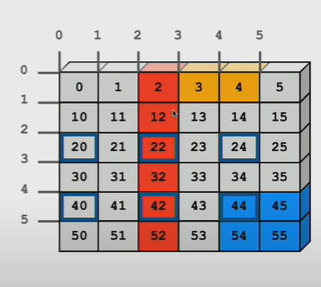

In [ ]:
# create the array by using previous knoweledge (no broadcasting yet!)
x = torch.arange(6)
x = x.view(-1,1)
y = torch.concat([x for i in range(6)],axis=1)
print(10*y)

x = x.view(1,-1)
z = torch.concat([x for i in range(6)],axis=0)
print(z)

a = z+10*y
print(a)

tensor([[ 0,  0,  0,  0,  0,  0],
        [10, 10, 10, 10, 10, 10],
        [20, 20, 20, 20, 20, 20],
        [30, 30, 30, 30, 30, 30],
        [40, 40, 40, 40, 40, 40],
        [50, 50, 50, 50, 50, 50]])
tensor([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]])
tensor([[ 0,  1,  2,  3,  4,  5],
        [10, 11, 12, 13, 14, 15],
        [20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55]])


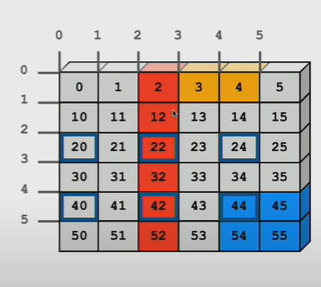

In [ ]:
# red
a[:,2].view(-1,1)

tensor([[ 2],
        [12],
        [22],
        [32],
        [42],
        [52]])

In [ ]:
# yellow
a[0,3:5]

tensor([3, 4])

In [ ]:
# blue
a[-2:,-2:]

tensor([[44, 45],
        [54, 55]])

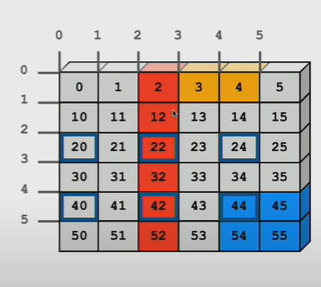

In [ ]:
#blue-border
a[2::2,::2]

tensor([[20, 22, 24],
        [40, 42, 44]])

In [ ]:
# fancy indexing, to get diagonal
# cordinates (indices) could be passed as lists as well.

# To get the 2nd, 5th and 6th rows
print(a[[1,4,5]])
# To get 3rd columns
print(a[:,[2]])
# Note the difference
print(a[:,2])
# getting diagonal terms
ind = [i for i in range(0,6)]
print(ind)
a[ind,ind]
# Note : Make a habit of reshaping if you are not sure about the output shape.

tensor([[10, 11, 12, 13, 14, 15],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55]])
tensor([[ 2],
        [12],
        [22],
        [32],
        [42],
        [52]])
tensor([ 2, 12, 22, 32, 42, 52])
[0, 1, 2, 3, 4, 5]


tensor([ 0, 11, 22, 33, 44, 55])

# Advanced --- Broadcasting!

The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:



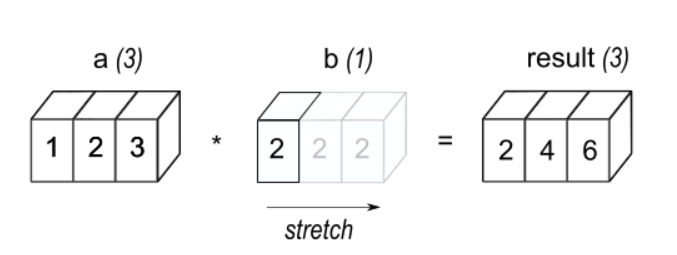

In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
b = 2.0
print(a * b)

# same as
b = torch.tensor(b)
print(b.shape,a.shape)
b*a # remember the operations are elementwise, so shape should match! (done by copying - not in memory tho)

tensor([2., 4., 6.])
torch.Size([]) torch.Size([3])


tensor([2., 4., 6.])

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

* they are equal, or

* one of them is 1

Note that missing dimensions are assumed to have size one. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays


In [ ]:
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[[1],[2]],[[3],[4]]])
print(a.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([2, 2, 1])


In [ ]:
# We can perfrom the "+" operation

# a shape : [1,2,3]
# b shape : [2,2,1]

# both satisfy the broadcasting criteria

# first, reshape a by adding extra dimension

print("changes made to a ...")
print(a)
x = a.view(1,2,3)
print("...")
print(x)
print("...")
x = torch.concat([x,x],axis = 0)
print(x)

print("changes made to b ...")
print(b)
print("...")
y = torch.concat([b,b,b],axis = 2)
print(y)
print("...")



changes made to a ...
tensor([[1, 2, 3],
        [4, 5, 6]])
...
tensor([[[1, 2, 3],
         [4, 5, 6]]])
...
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
changes made to b ...
tensor([[[1],
         [2]],

        [[3],
         [4]]])
...
tensor([[[1, 1, 1],
         [2, 2, 2]],

        [[3, 3, 3],
         [4, 4, 4]]])
...


In [ ]:
print(x + y)
print(a+b)
(x+y == a+b).all() # same matrices

print(a*b) # element-wise

tensor([[[ 2,  3,  4],
         [ 6,  7,  8]],

        [[ 4,  5,  6],
         [ 8,  9, 10]]])
tensor([[[ 2,  3,  4],
         [ 6,  7,  8]],

        [[ 4,  5,  6],
         [ 8,  9, 10]]])
tensor([[[ 1,  2,  3],
         [ 8, 10, 12]],

        [[ 3,  6,  9],
         [16, 20, 24]]])


## Exercise 2.

1. Do min-max scaling using broadcasting

In [ ]:
X = torch.tensor([[1,2,3],[4,3,5],[12,12,3],[2,4,1],[1,2,4],[4,12,5]])
print(X)
m = X.min(axis=0).values
print(m)
M = X.max(axis=0).values
print(M)
(X-m)/(M-m)
# So simple!

tensor([[ 1,  2,  3],
        [ 4,  3,  5],
        [12, 12,  3],
        [ 2,  4,  1],
        [ 1,  2,  4],
        [ 4, 12,  5]])
tensor([1, 2, 1])
tensor([12, 12,  5])


tensor([[0.0000, 0.0000, 0.5000],
        [0.2727, 0.1000, 1.0000],
        [1.0000, 1.0000, 0.5000],
        [0.0909, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.7500],
        [0.2727, 1.0000, 1.0000]])

2. Create the same array using broadcasting

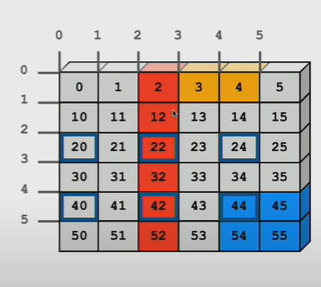

In [ ]:
x = torch.arange(0,6) # shape is (6)
a = x.view(1,-1) # shape is (1,6)
b = 10*x.view(-1,1) # shape is (6,1)
a + b

tensor([[ 0,  1,  2,  3,  4,  5],
        [10, 11, 12, 13, 14, 15],
        [20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55]])

In [ ]:
a = torch.ones(5)
b = a.view(-1,1)
print((a+ b)/2)
# same as
torch.ones((5,5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

# Some more stuff

In [ ]:
# Matrix multiplication
A = torch.tensor([[1,2,3],[4,5,6]]) #2x3
B = torch.tensor([[1],[0],[3]])  # 3x1
A@B # 2x1

tensor([[10],
        [22]])

In [ ]:
# 2d with 1d will do the operation but will return 1d (row, column vector wont be distinct in shape)
A = torch.tensor([[1,2,3],[4,5,6]]) #2x3
B = torch.tensor([1,0,3]) # 3
C = torch.tensor([1,2]) # 2
print(A@B)
print(C@A)
# same as
C.view(1,-1)@A # but this is in 2d

tensor([10, 22])
tensor([ 9, 12, 15])


tensor([[ 9, 12, 15]])

In [ ]:
# determinant
A = torch.tensor([[1.,3,5],[2,2,1],[1,0,3]])
print(torch.linalg.det(A)) # returns only the value (in built method)


# A Good exercise would be to do it manually!
# det(A) = sum (-1)^(j) det(M0j)

def det(A):
  if list(A.shape) == [1,1]:
    return A
  else:
    d = 0
    for j in range(A.shape[-1]):
           M = torch.concat([A[1:,:j],A[1:,j+1:]],dim=1)
           d = d + ((-1)**j)*A[0,j]*det(M)

  return d

print(det(A))



tensor(-19.)
tensor([[-19.]])
